# Trabajando con datetime en Pandas

In [21]:
import pandas as pd
import numpy as np

### 1. Fechas y horas en Python

Existe un módulo en Python llamado ``datetime`` que será nuestro aliado a la hora de trabajar con Fechas y Horas.
Podemos crear una estructura de fecha del siguiente modo:

In [3]:
from datetime import datetime
datetime(year = 2015, month = 7, day = 4)

datetime.datetime(2015, 7, 4, 0, 0)

Podemos también emplear el módulo ``dateutil`` para leer distintos formatos en cadenas de texto que puedan traer nuestros datos:

In [1]:
# https://dateutil.readthedocs.io/en/stable/parser.html#functions
from dateutil import parser
print(parser.parse("4th of July, 2015"))
print(parser.parse("07/04/2015"))
print(parser.parse("07/04/2015", dayfirst=True))

2015-07-04 00:00:00
2015-07-04 00:00:00
2015-04-07 00:00:00


In [6]:
print(parser.parse("7/4/2015"))
print(parser.parse("07-04-2015"))
print(parser.parse("2015-07-04"))

2015-07-04 00:00:00
2015-07-04 00:00:00
2015-07-04 00:00:00


Una vez se dispone del tipo ``datetime`` existen muchas operaciones que podemos realizar en base a la fecha. Por ejemplo, obtener el día de la semana:

In [9]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
datetime(year = 2015, month = 7, day = 4).strftime('%A')

'Saturday'

### 2. Fechas y Horas en Numpy

In [3]:
import numpy as np

date = np.array('2015-07-04', dtype = np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [13]:
np.array('07-04-2015', dtype = np.datetime64)

ValueError: Cannot create a NumPy datetime other than NaT with generic units

La ventaja de Numpy son las operaciones vectorizadas, que resultan eficientes en lo que al computo respecta:

In [14]:
date

array('2015-07-04', dtype='datetime64[D]')

In [15]:
np.arange(14)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [16]:
dates = date + np.arange(12)
dates

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [17]:
dates[0]

numpy.datetime64('2015-07-04')

Aquí tenéis una fecha con hora informada:

In [18]:
np.datetime64('2015-07-04 12:00:30')

numpy.datetime64('2015-07-04T12:00:30')

Observad que automaticamente se le asigna la zona horaria de la máquina en la que está corriendo.

Podemos forzar tiempos con distinta precisión numérica.

In [19]:
datetime = np.datetime64('2015-07-04 12:00:30', 'ns')
datetime

numpy.datetime64('2015-07-04T12:00:30.000000000')

La siguiente tabla en la documentación de [NumPy datetime64](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lista las distintas precisiones así como el lapso de tiempo absoluto en el que podemos reflejarlo.

|Código    | Significato     | Lapso (relative) | Lapso (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### 3. Fechas y Horas en Pandas

#### Argumentos por defecto

In [20]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df

date  value
0  3/10/2000      2
1  3/11/2000      3
2  3/12/2000      4

In [21]:
df.dtypes

date     object
value     int64
dtype: object

In [22]:
df['date'] = pd.to_datetime(df['date']) # dayfirst = False
df

date  value
0 2000-03-10      2
1 2000-03-11      3
2 2000-03-12      4

In [30]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

#### Formato con día primero

In [23]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

date  value
0 2000-10-03      2
1 2000-11-03      3
2 2000-12-03      4

#### Formatos custom

In [27]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")
df

date  value
0 2016-06-10 20:30:00      2
1 2016-07-01 19:45:30      3
2 2013-10-12 04:05:01      4

#### Errores de parseo

In [22]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'])

ValueError: time data "a/11/2000" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [25]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'ignore')
df.dtypes

/tmp/ipykernel_27805/3442125573.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['date'] = pd.to_datetime(df['date'], errors = 'ignore')


date     object
value     int64
dtype: object

In [26]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df

date  value
0 2000-03-10      2
1        NaT      3
2 2000-03-12      4

In [32]:
df[df['date'].isnull()]

date  value
1  NaT      3

In [33]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [34]:
print(df.at[0, 'date'])
print(df.at[1, 'date'])

2000-03-10 00:00:00
NaT


### 4. Composición basada en columnas

A veces la información nos vendrá dada en distintas columnas

In [35]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})

df

year  month  day
0  2015      2    4
1  2016      3    5

In [36]:
df.dtypes

year     int64
month    int64
day      int64
dtype: object

In [37]:
df['date'] = pd.to_datetime(df)

In [38]:
df

year  month  day       date
0  2015      2    4 2015-02-04
1  2016      3    5 2016-03-05

In [39]:
df.dtypes

year              int64
month             int64
day               int64
date     datetime64[ns]
dtype: object

### 5. Obtener los campos de la fecha

In [41]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

name        DoB
0    Tom 1997-08-05
1   Andy 1996-04-28
2  Lucas 1995-12-16

In [42]:
df['year'] = df['DoB'].dt.year
df['month'] = df['DoB'].dt.month
df['day'] = df['DoB'].dt.day
df

name        DoB  year  month  day
0    Tom 1997-08-05  1997      8    5
1   Andy 1996-04-28  1996      4   28
2  Lucas 1995-12-16  1995     12   16

In [43]:
df.dtypes

name             object
DoB      datetime64[ns]
year              int64
month             int64
day               int64
dtype: object

### 6. Obtener las semanas del año, el día de la semana y la condición de bisiesto

In [44]:
df['week_of_year'] = df['DoB'].dt.isocalendar().week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

name        DoB  year  month  day  week_of_year  day_of_week  is_leap_year
0    Tom 1997-08-05  1997      8    5            32            1         False
1   Andy 1996-04-28  1996      4   28            17            6          True
2  Lucas 1995-12-16  1995     12   16            50            5         False

In [46]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['day_of_week_name']=df['DoB'].dt.weekday.map(dw_mapping)
df

name        DoB  year  month  day  week_of_year  day_of_week  \
0    Tom 1997-08-05  1997      8    5            32            1   
1   Andy 1996-04-28  1996      4   28            17            6   
2  Lucas 1995-12-16  1995     12   16            50            5   

   is_leap_year day_of_week_name  
0         False          Tuesday  
1          True           Sunday  
2         False         Saturday

### 7. Sacar la edad de la fecha de nacimiento

In [47]:
pd.to_datetime('today')

Timestamp('2024-03-05 13:46:56.799814')

In [48]:
datetime.today()

datetime.datetime(2024, 3, 5, 13, 47, 3, 57791)

In [50]:
today = pd.to_datetime('today')
df['age'] = (today - df['DoB']).dt.days//365.25 # 0.25*4 = 1
df

name        DoB  year  month  day  week_of_year  day_of_week  \
0    Tom 1997-08-05  1997      8    5            32            1   
1   Andy 1996-04-28  1996      4   28            17            6   
2  Lucas 1995-12-16  1995     12   16            50            5   

   is_leap_year day_of_week_name   age  
0         False          Tuesday  26.0  
1          True           Sunday  27.0  
2         False         Saturday  28.0

### 8. Fecha como índice

In [51]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'])
df

date  num       city
0       2015-01-01 09:00:00    4     London
1       2015-01-01 09:01:00    4     London
2       2015-01-01 09:02:00    3     London
3       2015-01-01 09:03:00    3     London
4       2015-01-01 09:04:00    3     London
...                     ...  ...        ...
1795139 2019-01-31 15:56:00    3  Cambridge
1795140 2019-01-31 15:57:00    3  Cambridge
1795141 2019-01-31 15:58:00    3  Cambridge
1795142 2019-01-31 15:59:00    3  Cambridge
1795143 2019-01-31 16:00:00    2  Cambridge

[1795144 rows x 3 columns]

In [54]:
df.describe(include='all', datetime_is_numeric=True)

date           num     city
count                         1795144  1.795144e+06  1795144
unique                            NaN           NaN        4
top                               NaN           NaN   London
freq                              NaN           NaN   448786
mean    2017-01-16 10:05:27.579737344  2.801503e+00      NaN
min               2015-01-01 09:00:00  1.000000e+00      NaN
25%               2016-01-08 12:30:00  2.000000e+00      NaN
50%               2017-01-17 00:30:00  3.000000e+00      NaN
75%               2018-01-24 12:30:00  3.000000e+00      NaN
max               2019-01-31 16:00:00  4.000000e+00      NaN
std                               NaN  8.714650e-01      NaN

In [65]:
df.dtypes

date    datetime64[ns]
num              int64
city            object
dtype: object

In [55]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'])
df.set_index(['date'], inplace=True)
df.head()

num    city
date                            
2015-01-01 09:00:00    4  London
2015-01-01 09:01:00    4  London
2015-01-01 09:02:00    3  London
2015-01-01 09:03:00    3  London
2015-01-01 09:04:00    3  London

In [56]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'], index_col = 'date')
df.head()

num    city
date                            
2015-01-01 09:00:00    4  London
2015-01-01 09:01:00    4  London
2015-01-01 09:02:00    3  London
2015-01-01 09:03:00    3  London
2015-01-01 09:04:00    3  London

In [57]:
# Tenemos un DateTimeIndex
df.index

DatetimeIndex(['2015-01-01 09:00:00', '2015-01-01 09:01:00',
               '2015-01-01 09:02:00', '2015-01-01 09:03:00',
               '2015-01-01 09:04:00', '2015-01-01 09:05:00',
               '2015-01-01 09:06:00', '2015-01-01 09:07:00',
               '2015-01-01 09:08:00', '2015-01-01 09:09:00',
               ...
               '2019-01-31 15:51:00', '2019-01-31 15:52:00',
               '2019-01-31 15:53:00', '2019-01-31 15:54:00',
               '2019-01-31 15:55:00', '2019-01-31 15:56:00',
               '2019-01-31 15:57:00', '2019-01-31 15:58:00',
               '2019-01-31 15:59:00', '2019-01-31 16:00:00'],
              dtype='datetime64[ns]', name='date', length=1795144, freq=None)

In [58]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

### 9. Seleccionar en base al año

In [59]:
df.loc['2018']

num       city
date                               
2018-01-01 09:00:00    2     London
2018-01-01 09:01:00    1     London
2018-01-01 09:02:00    3     London
2018-01-01 09:03:00    3     London
2018-01-01 09:04:00    3     London
...                  ...        ...
2018-12-31 15:56:00    4  Cambridge
2018-12-31 15:57:00    2  Cambridge
2018-12-31 15:58:00    3  Cambridge
2018-12-31 15:59:00    3  Cambridge
2018-12-31 16:00:00    2  Cambridge

[439524 rows x 2 columns]

In [60]:
df.loc['2018', 'num'].head()

date
2018-01-01 09:00:00    2
2018-01-01 09:01:00    1
2018-01-01 09:02:00    3
2018-01-01 09:03:00    3
2018-01-01 09:04:00    3
Name: num, dtype: int64

In [61]:
df.loc['2018'].groupby('city').sum()

num
city             
Cambridge  308428
Durham     307965
London     307431
Oxford     307366

### 10. Seleccionar el año y mes

In [62]:
df.loc['2018-5'].head()

num    city
date                            
2018-05-01 09:00:00    1  London
2018-05-01 09:01:00    4  London
2018-05-01 09:02:00    3  London
2018-05-01 09:03:00    2  London
2018-05-01 09:04:00    3  London

In [63]:
df.loc['2018-5-1'].head()

num    city
date                            
2018-05-01 09:00:00    1  London
2018-05-01 09:01:00    4  London
2018-05-01 09:02:00    3  London
2018-05-01 09:03:00    2  London
2018-05-01 09:04:00    3  London

In [64]:
cond = df.index.month == 2
df[cond].head()

num    city
date                            
2015-02-02 09:00:00    4  London
2015-02-02 09:01:00    3  London
2015-02-02 09:02:00    3  London
2015-02-02 09:03:00    2  London
2015-02-02 09:04:00    1  London

### 12. Operar con fechas

In [71]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

name        DoB
0    Tom 1997-08-05
1   Andy 1996-04-28
2  Lucas 1995-12-16

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.tseries.offsets.BusinessDay.html

In [72]:
from pandas.tseries.offsets import DateOffset, BDay # Business days

print(df['DoB'] + DateOffset(days = 5))
print(df['DoB'] + DateOffset(days = -5))
print(df['DoB'] + DateOffset(months = 5))

0   1997-08-10
1   1996-05-03
2   1995-12-21
Name: DoB, dtype: datetime64[ns]
0   1997-07-31
1   1996-04-23
2   1995-12-11
Name: DoB, dtype: datetime64[ns]
0   1998-01-05
1   1996-09-28
2   1996-05-16
Name: DoB, dtype: datetime64[ns]


In [73]:
BDay(10)

<10 * BusinessDays>

In [74]:
print(df['DoB'])
print(df['DoB'] + BDay(10))

0   1997-08-05
1   1996-04-28
2   1995-12-16
Name: DoB, dtype: datetime64[ns]
0   1997-08-19
1   1996-05-10
2   1995-12-29
Name: DoB, dtype: datetime64[ns]


In [75]:
df['DoB+10BD'] = df['DoB'] + BDay(10)
df

name        DoB   DoB+10BD
0    Tom 1997-08-05 1997-08-19
1   Andy 1996-04-28 1996-05-10
2  Lucas 1995-12-16 1995-12-29

In [78]:
df['date_diff'] = (df['DoB+10BD'] - df['DoB']).dt.days
df

name        DoB   DoB+10BD  date_diff
0    Tom 1997-08-05 1997-08-19         14
1   Andy 1996-04-28 1996-05-10         12
2  Lucas 1995-12-16 1995-12-29         13

In [96]:
df.dtypes

name                 object
DoB          datetime64[ns]
DoB+10BD     datetime64[ns]
date_diff             int64
dtype: object

### 13. Rangos de fechas

Pandas ofrece para poder trabajar con rangos las opciones de ``pd.date_range()`` para timestamps, ``pd.period_range()`` para periodos, y ``pd.timedelta_range()`` para lapsos de tiempo. Son similares a las funciones ``range`` y ``np.arange`` que vimos previamente.

Por defecto funciona con lapsos de un día:

In [79]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Podemos definir el periodo dado solo una fecha de inicio.

In [80]:
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

O modificar el espaciado con el argumento ``freq``, que por defecto opera a nivel diario ``D``. Aquí tenemos un ejemplo mensual:

In [83]:
pd.date_range('2015-01-01', periods = 12, freq='M')

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

### 14. Valores faltantes

In [27]:
# Creamos algunos missings aposta con la rolling window
df = pd.read_csv('data/city_sales.csv', parse_dates=['date'], index_col='date')
df

num       city
date                               
2015-01-01 09:00:00    4     London
2015-01-01 09:01:00    4     London
2015-01-01 09:02:00    3     London
2015-01-01 09:03:00    3     London
2015-01-01 09:04:00    3     London
...                  ...        ...
2019-01-31 15:56:00    3  Cambridge
2019-01-31 15:57:00    3  Cambridge
2019-01-31 15:58:00    3  Cambridge
2019-01-31 15:59:00    3  Cambridge
2019-01-31 16:00:00    2  Cambridge

[1795144 rows x 2 columns]

In [29]:
df['rolling_sum'] = df['num'].rolling(3).mean()
df.head()

num    city  rolling_sum
date                                         
2015-01-01 09:00:00    4  London          NaN
2015-01-01 09:01:00    4  London          NaN
2015-01-01 09:02:00    3  London     3.666667
2015-01-01 09:03:00    3  London     3.333333
2015-01-01 09:04:00    3  London     3.000000

In [31]:
#df['rolling_sum_back'] = df['rolling_sum'].fillna(method = 'backfill')
df['rolling_sum_back'] = df['rolling_sum'].bfill()
df.head()

num    city  rolling_sum  rolling_sum_back
date                                                           
2015-01-01 09:00:00    4  London          NaN          3.666667
2015-01-01 09:01:00    4  London          NaN          3.666667
2015-01-01 09:02:00    3  London     3.666667          3.666667
2015-01-01 09:03:00    3  London     3.333333          3.333333
2015-01-01 09:04:00    3  London     3.000000          3.000000

### 15. Muestreo, ventanas y desplazamientos (shift)

In [38]:
goog = pd.read_csv('data/GOOG.csv')
goog['Date'] =  pd.to_datetime(goog['Date'])
goog.set_index('Date', inplace=True)
goog

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04   312.304413   313.579620   310.954468   312.204773   312.204773   
2010-01-05   312.418976   312.747742   309.609497   310.829926   310.829926   
2010-01-06   311.761444   311.761444   302.047852   302.994293   302.994293   
2010-01-07   303.562164   303.861053   295.218445   295.940735   295.940735   
2010-01-08   294.894653   300.498657   293.455048   299.885956   299.885956   
...                 ...          ...          ...          ...          ...   
2019-12-27  1362.989990  1364.530029  1349.310059  1351.890015  1351.890015   
2019-12-30  1350.000000  1353.000000  1334.020020  1336.140015  1336.140015   
2019-12-31  1330.109985  1338.000000  1329.084961  1337.020020  1337.020020   
2020-01-02  1341.550049  1368.140015  1341.550049  1367.369995  1367.369995   
2020-01-03  1347.859985  1372.500000  1345.543945  1360.660034  1360.660034   

              Volume  
Date                  
2010-01-04   3927000  
2010-01-05   6031900  
2010-01-06   7987100  
2010-01-07  12876600  
2010-01-08   9483900  
...              ...  
2019-12-27   1038400  
2019-12-30   1050900  
2019-12-31    961800  
2020-01-02   1406600  
2020-01-03   1186400  

[2518 rows x 6 columns]

In [39]:
goog.head(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  312.304413  313.579620  310.954468  312.204773  312.204773   
2010-01-05  312.418976  312.747742  309.609497  310.829926  310.829926   
2010-01-06  311.761444  311.761444  302.047852  302.994293  302.994293   
2010-01-07  303.562164  303.861053  295.218445  295.940735  295.940735   
2010-01-08  294.894653  300.498657  293.455048  299.885956  299.885956   
2010-01-11  301.101410  301.101410  295.910858  299.432648  299.432648   
2010-01-12  297.709106  297.963165  292.902130  294.137512  294.137512   
2010-01-13  287.168610  293.091431  285.878448  292.448822  292.448822   
2010-01-14  290.859772  295.990540  290.316833  293.823669  293.823669   
2010-01-15  295.562164  295.671753  287.940735  288.917053  288.917053   

              Volume  
Date                  
2010-01-04   3927000  
2010-01-05   6031900  
2010-01-06   7987100  
2010-01-07  12876600  
2010-01-08   9483900  
2010-01-11  14479800  
2010-01-12   9742900  
2010-01-13  13041800  
2010-01-14   8511900  
2010-01-15  10909600

In [40]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-01-04 to 2020-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


In [41]:
# goog = goog['Close']
# goog = goog.fillna(method='ffill')
goog = goog.ffill()
goog

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04   312.304413   313.579620   310.954468   312.204773   312.204773   
2010-01-05   312.418976   312.747742   309.609497   310.829926   310.829926   
2010-01-06   311.761444   311.761444   302.047852   302.994293   302.994293   
2010-01-07   303.562164   303.861053   295.218445   295.940735   295.940735   
2010-01-08   294.894653   300.498657   293.455048   299.885956   299.885956   
...                 ...          ...          ...          ...          ...   
2019-12-27  1362.989990  1364.530029  1349.310059  1351.890015  1351.890015   
2019-12-30  1350.000000  1353.000000  1334.020020  1336.140015  1336.140015   
2019-12-31  1330.109985  1338.000000  1329.084961  1337.020020  1337.020020   
2020-01-02  1341.550049  1368.140015  1341.550049  1367.369995  1367.369995   
2020-01-03  1347.859985  1372.500000  1345.543945  1360.660034  1360.660034   

              Volume  
Date                  
2010-01-04   3927000  
2010-01-05   6031900  
2010-01-06   7987100  
2010-01-07  12876600  
2010-01-08   9483900  
...              ...  
2019-12-27   1038400  
2019-12-30   1050900  
2019-12-31    961800  
2020-01-02   1406600  
2020-01-03   1186400  

[2518 rows x 6 columns]

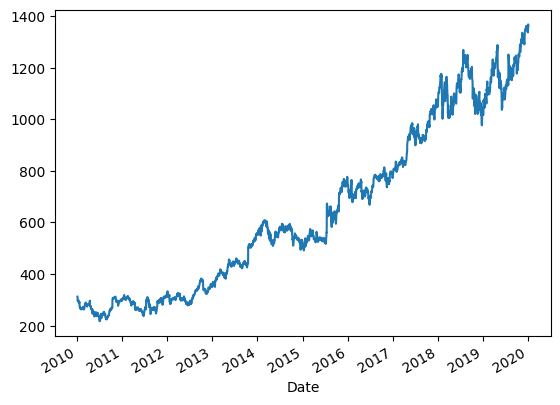

In [42]:
goog['Close'].plot();

In [46]:
goog.resample('BYE').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-12-31   267.154630   269.464070   264.402920   266.811472   266.811472   
2011-12-30   283.523139   286.110425   280.751839   283.424738   283.424738   
2012-12-31   320.195071   322.927847   317.288286   320.208021   320.208021   
2013-12-31   440.160271   443.407307   437.217431   440.470378   440.470378   
2014-12-31   560.709645   564.495206   555.162255   559.803290   559.803290   
2015-12-31   602.057314   607.442765   596.090603   602.005681   602.005681   
2016-12-30   743.732459   749.421629   737.597905   743.486707   743.486707   
2017-12-29   921.121193   926.898963   915.331412   921.780837   921.780837   
2018-12-31  1113.554101  1125.777606  1101.001658  1113.225134  1113.225134   
2019-12-31  1187.009821  1196.787599  1178.523734  1188.393057  1188.393057   
2020-12-31  1344.705017  1370.320007  1343.546997  1364.015015  1364.015015   

                  Volume  
Date                      
2010-12-31  6.383553e+06  
2011-12-30  6.179412e+06  
2012-12-31  5.228172e+06  
2013-12-31  4.190346e+06  
2014-12-31  2.487038e+06  
2015-12-31  2.069434e+06  
2016-12-30  1.832266e+06  
2017-12-29  1.476514e+06  
2018-12-31  1.741965e+06  
2019-12-31  1.414085e+06  
2020-12-31  1.296500e+06

In [45]:
goog.asfreq('BYE')

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-12-31   297.255798   298.092682   294.909607   295.875977   295.875977   
2011-12-30   319.811279   322.172424   319.811279   321.744019   321.744019   
2012-12-31   348.693024   353.958282   346.700470   352.369232   352.369232   
2013-12-31   554.043335   558.406982   551.064453   558.262512   558.262512   
2014-12-31   529.795471   531.141724   524.360352   524.958740   524.958740   
2015-12-31   769.500000   769.500000   758.340027   758.880005   758.880005   
2016-12-30   782.750000   782.780029   770.409973   771.820007   771.820007   
2017-12-29  1046.719971  1049.699951  1044.900024  1046.400024  1046.400024   
2018-12-31  1050.959961  1052.699951  1023.590027  1035.609985  1035.609985   
2019-12-31  1330.109985  1338.000000  1329.084961  1337.020020  1337.020020   

             Volume  
Date                 
2010-12-31  3090000  
2011-12-30  3577800  
2012-12-31  4009600  
2013-12-31  2725900  
2014-12-31  1368200  
2015-12-31  1500900  
2016-12-30  1770000  
2017-12-29   887500  
2018-12-31  1493300  
2019-12-31   961800

In [47]:
goog.loc['2012-12-31']

Open         3.486930e+02
High         3.539583e+02
Low          3.467005e+02
Close        3.523692e+02
Adj Close    3.523692e+02
Volume       4.009600e+06
Name: 2012-12-31 00:00:00, dtype: float64

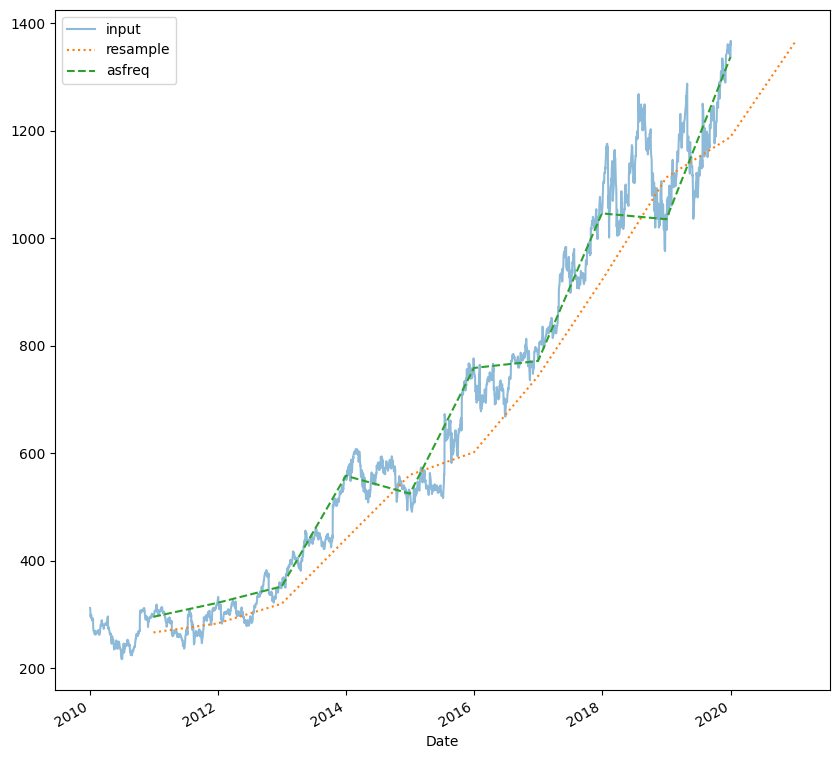

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
goog['Close'].plot(alpha=0.5, style='-')
goog['Close'].resample('BYE').mean().plot(style=':')
goog['Close'].asfreq('BYE').plot(style='--');

plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [50]:
goog.asfreq('BYE')

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-12-31   297.255798   298.092682   294.909607   295.875977   295.875977   
2011-12-30   319.811279   322.172424   319.811279   321.744019   321.744019   
2012-12-31   348.693024   353.958282   346.700470   352.369232   352.369232   
2013-12-31   554.043335   558.406982   551.064453   558.262512   558.262512   
2014-12-31   529.795471   531.141724   524.360352   524.958740   524.958740   
2015-12-31   769.500000   769.500000   758.340027   758.880005   758.880005   
2016-12-30   782.750000   782.780029   770.409973   771.820007   771.820007   
2017-12-29  1046.719971  1049.699951  1044.900024  1046.400024  1046.400024   
2018-12-31  1050.959961  1052.699951  1023.590027  1035.609985  1035.609985   
2019-12-31  1330.109985  1338.000000  1329.084961  1337.020020  1337.020020   

             Volume  
Date                 
2010-12-31  3090000  
2011-12-30  3577800  
2012-12-31  4009600  
2013-12-31  2725900  
2014-12-31  1368200  
2015-12-31  1500900  
2016-12-30  1770000  
2017-12-29   887500  
2018-12-31  1493300  
2019-12-31   961800

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``ME``  | Month end           | ``BME`` | Business month end   |
| ``QE``  | Quarter end         | ``BQE`` | Business quarter end |
| ``YE``  | Year end            | ``BYE`` | Business year end    |
| ``h``  | Hours               | ``bh`` | Business hours       |
| ``t``  | Minutes             |        |                      |
| ``s``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

In [65]:
goog = goog['Close']

In [66]:
pd.DataFrame({'Data': goog,
             'Data-7': goog.shift(7),
             'Diff': goog - goog.shift(7),
             '%Crec': round(((goog - goog.shift(7))/goog)*100,2)})

Data       Data-7       Diff  %Crec
Date                                                  
2010-01-04   312.204773          NaN        NaN    NaN
2010-01-05   310.829926          NaN        NaN    NaN
2010-01-06   302.994293          NaN        NaN    NaN
2010-01-07   295.940735          NaN        NaN    NaN
2010-01-08   299.885956          NaN        NaN    NaN
...                 ...          ...        ...    ...
2019-12-27  1351.890015  1355.119995  -3.229980  -0.24
2019-12-30  1336.140015  1352.619995 -16.479980  -1.23
2019-12-31  1337.020020  1356.040039 -19.020019  -1.42
2020-01-02  1367.369995  1349.589966  17.780029   1.30
2020-01-03  1360.660034  1348.839966  11.820068   0.87

[2518 rows x 4 columns]

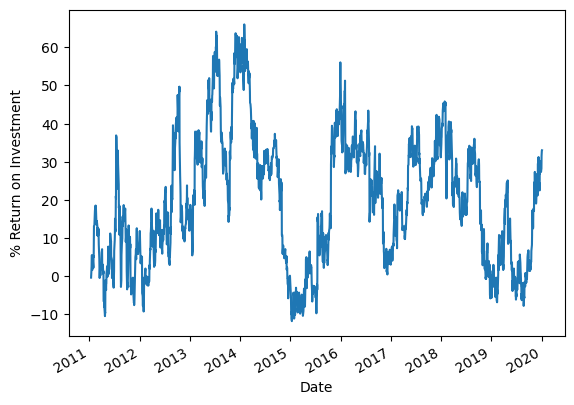

In [67]:
# Calcular el ROI de la inversión
ROI = 100 * (goog - goog.shift(261)) / goog.shift(261)
ROI.plot()
plt.ylabel('% Return on Investment');

### 16. Ventana móvil

In [70]:
rolling = goog.rolling(261, center=True) # 365 - weekends (aprox(52*2))
rolling

Rolling [window=261,center=True,axis=0,method=single]

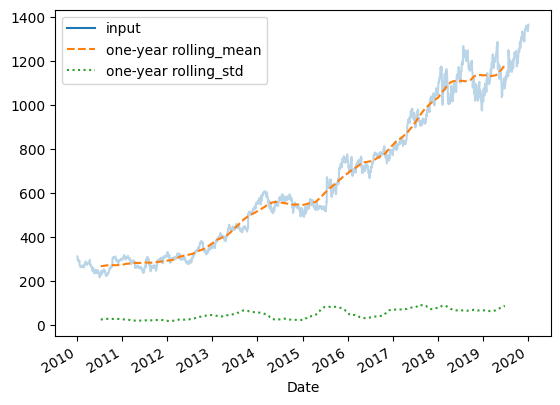

In [69]:
data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)